
# Analysis (8 points):

## Name: Gabriel Balarezo


Within a single python notebook **analysis.ipynb**, add the following:

#### (g) Use your script to generate three simulations: one for $e=0.01671$ (Earth's eccentricity), one for $e=0.25$ (which is Pluto's eccentricity), and one for $e=0.967$ (Halley's comet eccentricity) for $T=5$ and RK2.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import the module 
import odekepler.kepler as kp

In [2]:
# here we initialise three systems, one for each eccentricity value

# define the period
T = 5 # years 

# define the different eccentricities
e_earth = 0.01671
e_pluto = 0.25
e_halley = 0.967

In [3]:
pwd

'/home/pacman/Documents/git-repositories/kepler-module'

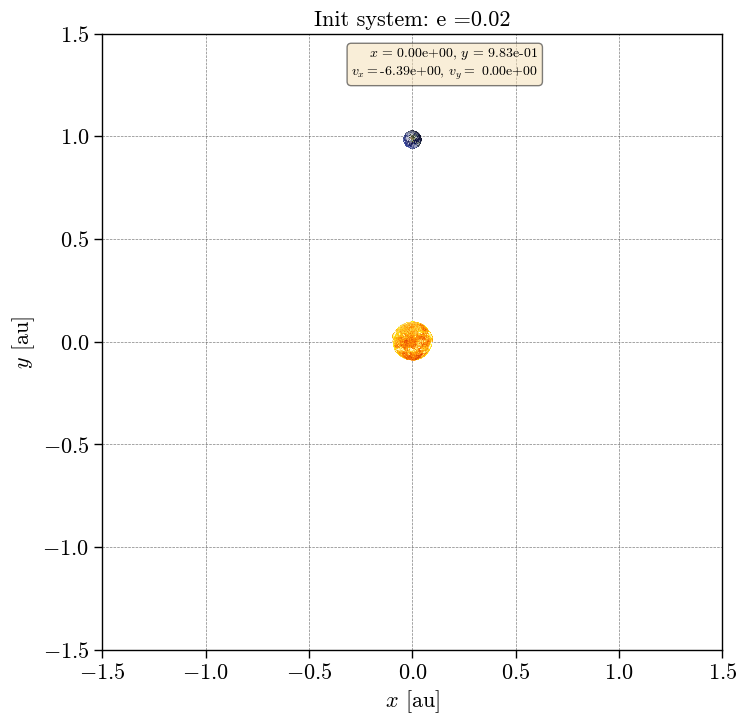

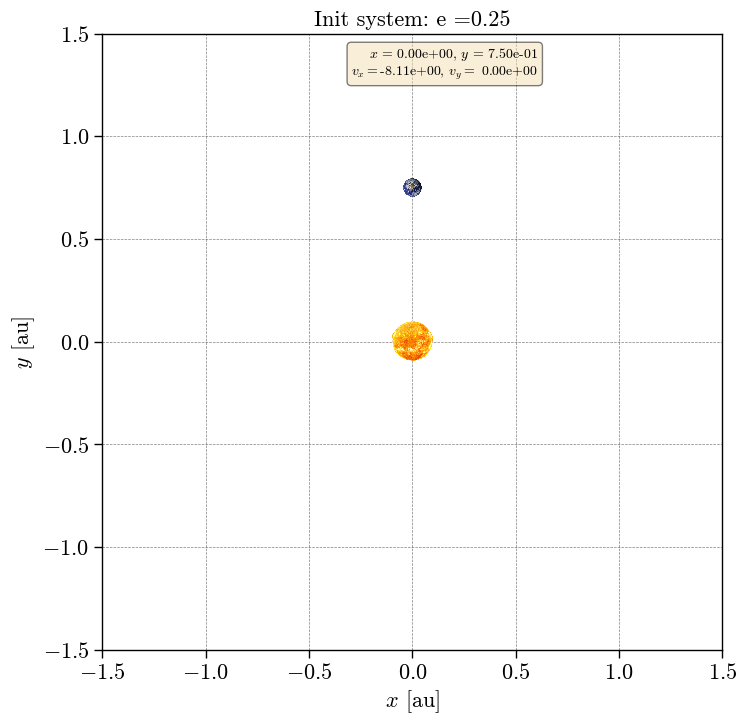

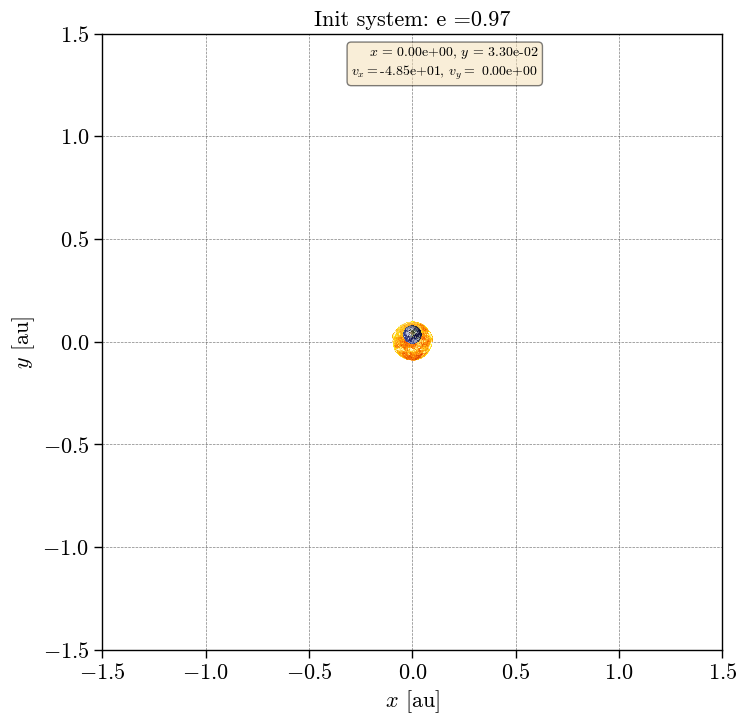

In [4]:
# initialize the three systems
earth_system = kp.initialise_system(e_earth, T, './outputfolder/eart_intial_system.png')
pluto_system = kp.initialise_system(e_pluto, T, './outputfolder/pluto_intial_system.png')
halley_system = kp.initialise_system(e_halley, T, './outputfolder/halley_initial_system.png')

In [5]:
# proceed to integrate the three systems 

earth_orbit = kp.RKIntegrate.RK2(earth_system, 0.01, "./outputfolder/earth_orbit.txt")
pluto_orbit = kp.RKIntegrate.RK2(pluto_system, 0.01, "./outputfolder/pluto_orbit.txt")
halley_orbit = kp.RKIntegrate.RK2(halley_system, 0.01, "./outputfolder/halley_orbit.txt")

Integrating system...
Saving integrated orbit...
Integrating system...
Saving integrated orbit...
Integrating system...
Saving integrated orbit...


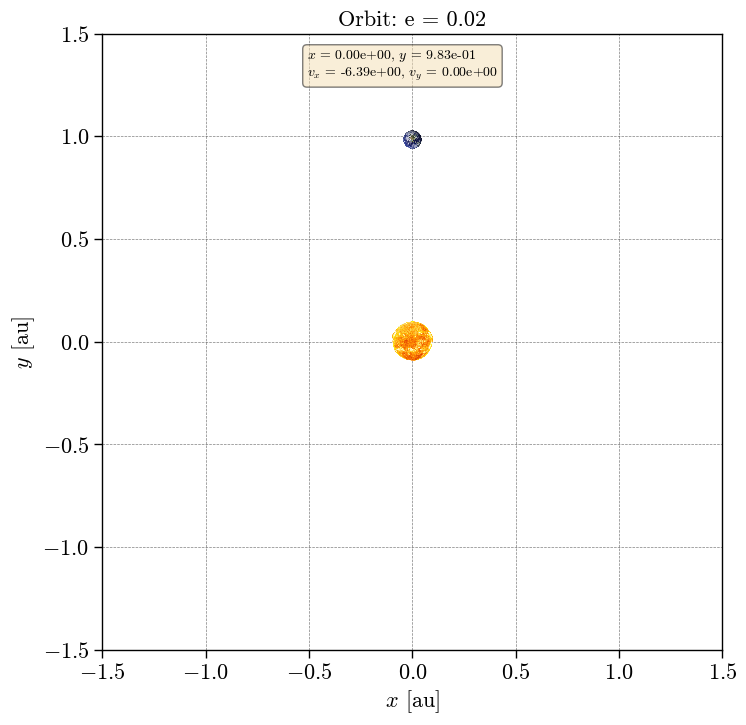

In [6]:
# We can generate the animations also, but since it takes quite a lot of time, i will
# generate just for the earth
animation = kp.animation_orbit(earth_orbit, e_earth, "./outputfolder/earth_orbit.gif")

In [9]:
# you can find the simulation in the output folder
from IPython import display

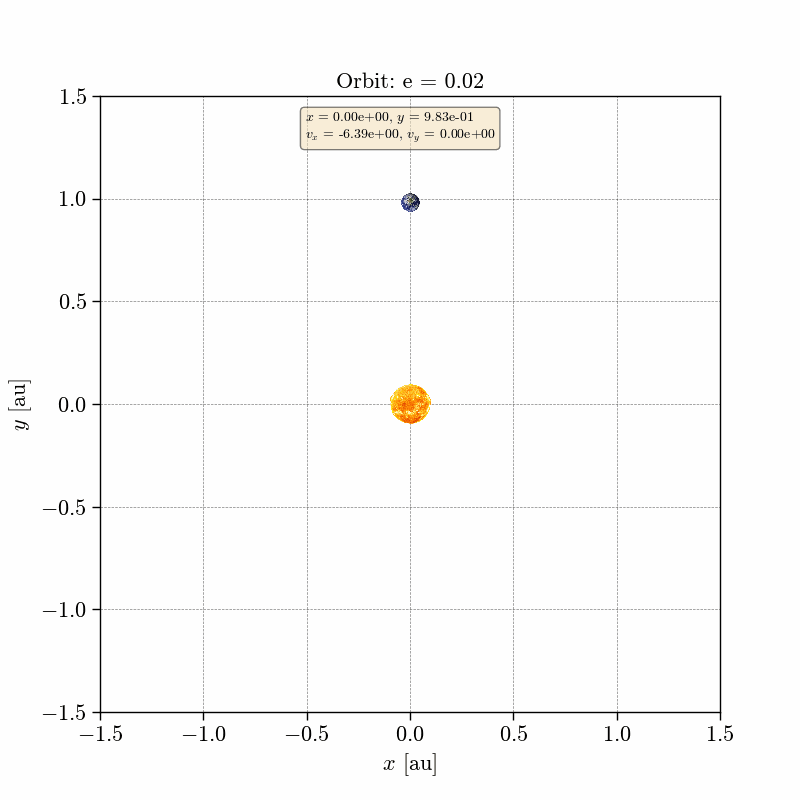

In [10]:
display.Image("./outputfolder/earth_orbit.gif")


#### (h) What would happen if Earth would have the eccentrity of Pluto or Halley's comet? It may be helpful to compare the orbital history for all values of $e$ in a single plot throughout time.


In [11]:
# For this, lets plot how the x-component of the orbits evolves in time

# get the time array 
t = kp.time_array(5., 0.01)

# get the x-component of the three orbits
x1 = earth_orbit[:, 0]
x2 = pluto_orbit[:, 0]
x3 = halley_orbit[:, 0]

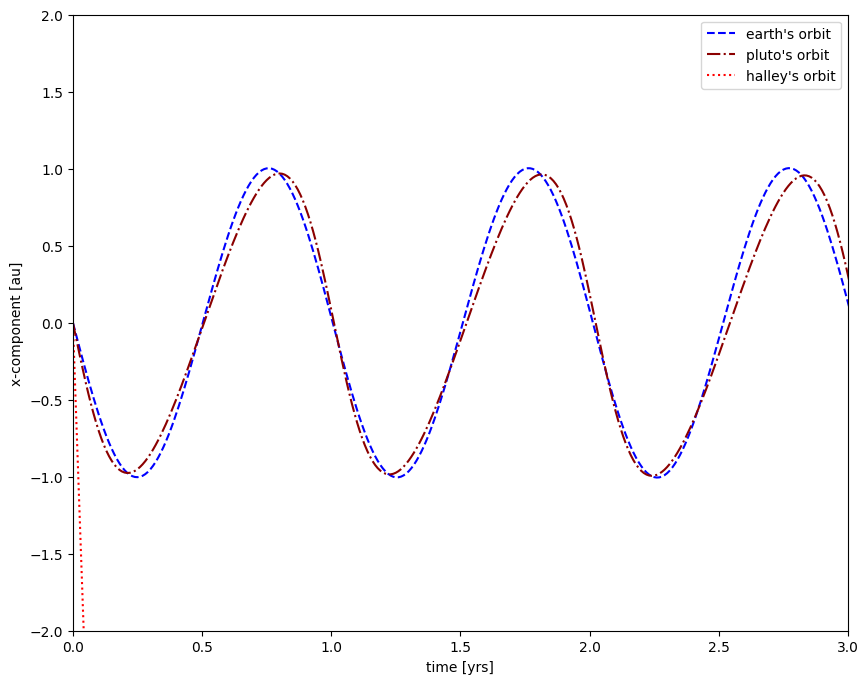

In [12]:
# plot 
fig, ax = plt.subplots(figsize = (10, 8))

ax.plot(t, x1, linestyle = '--', color = 'blue', label = "earth's orbit")
ax.plot(t, x2, linestyle = '-.', color = "darkred", label = "pluto's orbit")
ax.plot(t, x3, linestyle = ':', color = 'red', label = "halley's orbit")

ax.set_xlabel('time [yrs]')
ax.set_ylabel('x-component [au]')
ax.set_xlim(0, 3)
ax.set_ylim(-2, 2)

plt.legend()
plt.show()

We can notice that the two first orbits are periodic, and the third one can barely be seen. It is because of the eccenticity, the orbit has a larger period (76 years) so its periodicity cannot be seen in this plot.

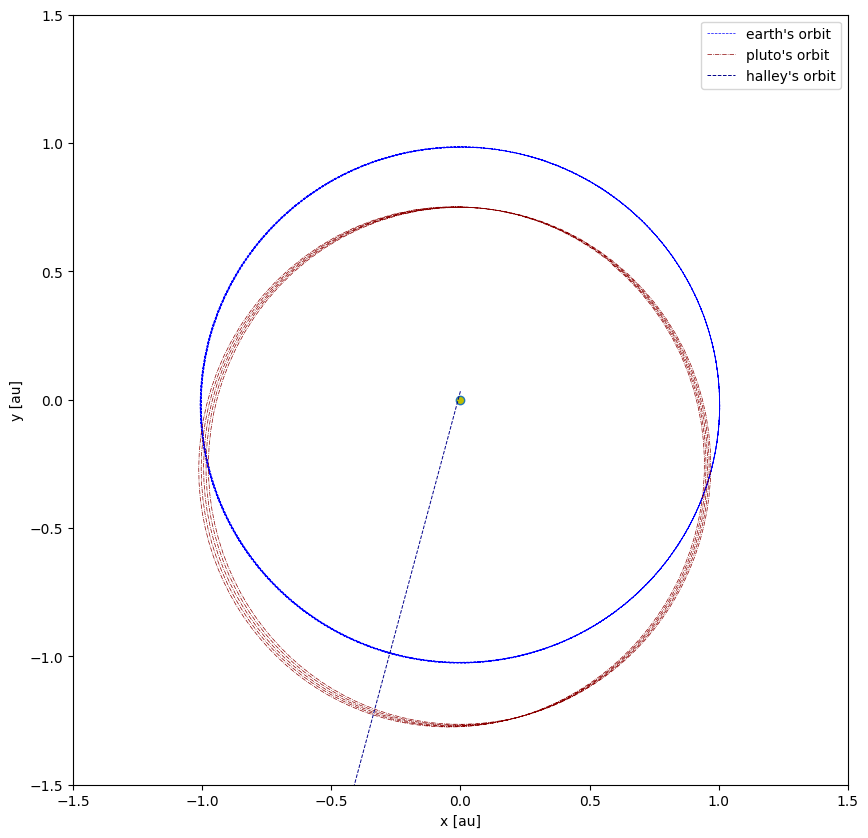

In [13]:
# We can also plot the three orbits
# get the y-component of the orbits
y1 = earth_orbit[:, 1]
y2 = pluto_orbit[:, 1]
y3 = halley_orbit[:, 1]

# plot
fig, ax = plt.subplots(figsize = (10, 10))

ax.plot(0, 0, linestyle='', marker='o', markerfacecolor='y')
ax.plot(x1, y1, linestyle = '--', color = 'b', lw = 0.5, label = "earth's orbit")
ax.plot(x2, y2, linestyle = '-.', color = 'darkred', lw = 0.5, label = "pluto's orbit")
ax.plot(x3, y3, linestyle = '--', color = 'darkblue', lw = 0.7, label = "halley's orbit")

ax.set_xlabel("x [au]")
ax.set_ylabel("y [au]")
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
plt.legend()
plt.show()

#### Answer: 
Using the plots we can say that if the Earth would have the Pluto, it's orbit would be narrower. In addition, at the perihelion, the earth would be closer to the sun, and its velocity at that point will increase as well. On the other hand, we can see that if the Earth would have the eccentricity of the Halley's comet, then the Earth would have a orbit really big, and it will be really close to the Sun at the perihelion. We must take into account that the period of the Halley is around 76 years. That's the reason why we cannot see an ellipse for that orbit in the given period.

#### (i) Use your script to generate two additional simulations only for $e=0.01671$ (Earth's eccentricity) with  RK3 and RK4.



In [14]:
# Since we already initialised the system, we jus need to integrate 
RK3_earth_orbit = kp.RKIntegrate.RK3(earth_system, 0.01, "./outputfolder/RK3_earth_orbit.txt")
RK4_earth_orbit = kp.RKIntegrate.RK4(earth_system, 0.01, "./outputfolder/RK4_earth_orbit.txt")

Integrating system...
Saving integrated orbit...
Integrating system...
Saving integrated orbit...


#### (j) Use your script to measure convergence of the simulations with RK3 and RK4 for $e=0.01671$ by integrating at a number of different time steps. To analyse convergence, you need to define some measure for the error, e.g., you can consider the change in radius after one period (i.e., at $T=1$), and then plot it against different time steps for both RK methods. Thus, you should add additional functions for this to your code in **kepler.py**. 

**Note:** Please include all your simulation outputs in the **outputfolder** for a reference.

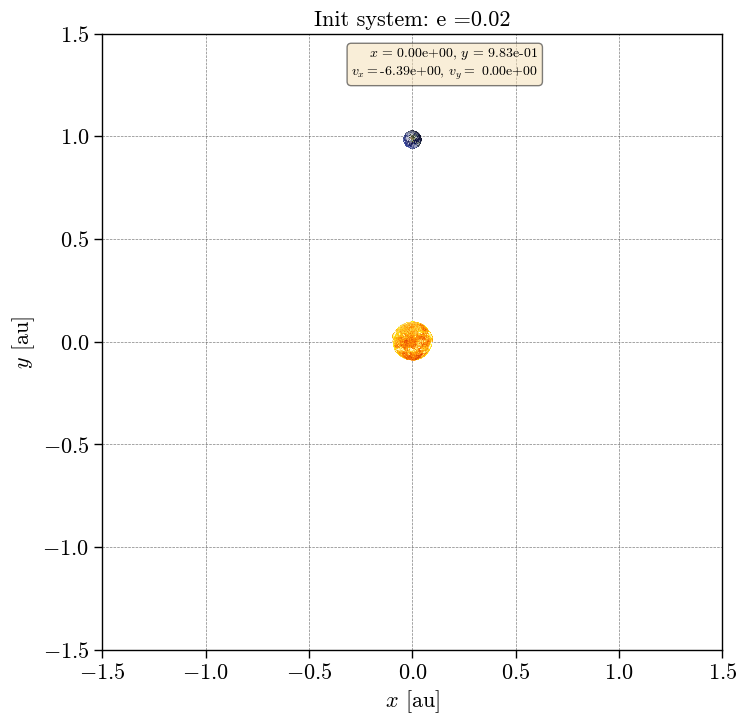

In [15]:
# First, let's generate three simulations for each RK method, each one with different time step 
# Initialise the system for a T=1 period 
new_earth_system = kp.initialise_system(e_earth, 1., './outputfolder/new_earth_intial_system.png')

# define the time steps 
dt_1 = 0.01 # days
dt_2 = 0.03 # days
dt_3 = 0.05 # days
dt_4 = 0.07 # days
dt_5 = 0.1 # days

In [16]:
# Integrate using RK3
rk3_orbit_1 = kp.RKIntegrate.RK3(new_earth_system, dt_1, "./outputfolder/rk3_orbit_1.txt")
rk3_orbit_2 = kp.RKIntegrate.RK3(new_earth_system, dt_2, "./outputfolder/rk3_orbit_2.txt")
rk3_orbit_3 = kp.RKIntegrate.RK3(new_earth_system, dt_3, "./outputfolder/rk3_orbit_3.txt")
rk3_orbit_4 = kp.RKIntegrate.RK3(new_earth_system, dt_4, "./outputfolder/rk3_orbit_4.txt")
rk3_orbit_5 = kp.RKIntegrate.RK3(new_earth_system, dt_5, "./outputfolder/rk3_orbit_5.txt")


Integrating system...
Saving integrated orbit...
Integrating system...
Saving integrated orbit...
Integrating system...
Saving integrated orbit...
Integrating system...
Saving integrated orbit...
Integrating system...
Saving integrated orbit...


In [17]:
# Integrate using RK4
rk4_orbit_1 = kp.RKIntegrate.RK4(new_earth_system, dt_1, "./outputfolder/rk4_orbit_1.txt")
rk4_orbit_2 = kp.RKIntegrate.RK4(new_earth_system, dt_2, "./outputfolder/rk4_orbit_2.txt")
rk4_orbit_3 = kp.RKIntegrate.RK4(new_earth_system, dt_3, "./outputfolder/rk4_orbit_3.txt")
rk4_orbit_4 = kp.RKIntegrate.RK4(new_earth_system, dt_4, "./outputfolder/rk4_orbit_4.txt")
rk4_orbit_5 = kp.RKIntegrate.RK4(new_earth_system, dt_5, "./outputfolder/rk4_orbit_5.txt")

Integrating system...
Saving integrated orbit...
Integrating system...
Saving integrated orbit...
Integrating system...
Saving integrated orbit...
Integrating system...
Saving integrated orbit...
Integrating system...
Saving integrated orbit...


In [18]:
# Let's compute the radius variations after T =1

# RK3 integrated orbits
rk3_r = kp.orbit_error(rk3_orbit_1, rk3_orbit_2, rk3_orbit_3, rk3_orbit_4, rk3_orbit_5)

# RK4 integrated orbits
rk4_r = kp.orbit_error(rk4_orbit_1, rk4_orbit_2, rk4_orbit_3, rk4_orbit_4, rk4_orbit_5)

In [19]:
# get the initial radius
ics = new_earth_system.ics()

r_0 = np.sqrt(ics[0]**2 + ics[1]**2)

In [20]:
print(r_0)
print(rk3_r)
print(rk4_r)


0.98329
[0.98304792 0.97657788 0.94558812 0.8335502  0.4963374 ]
[0.98328985 0.98338805 0.98279732 0.98135376 0.96486185]


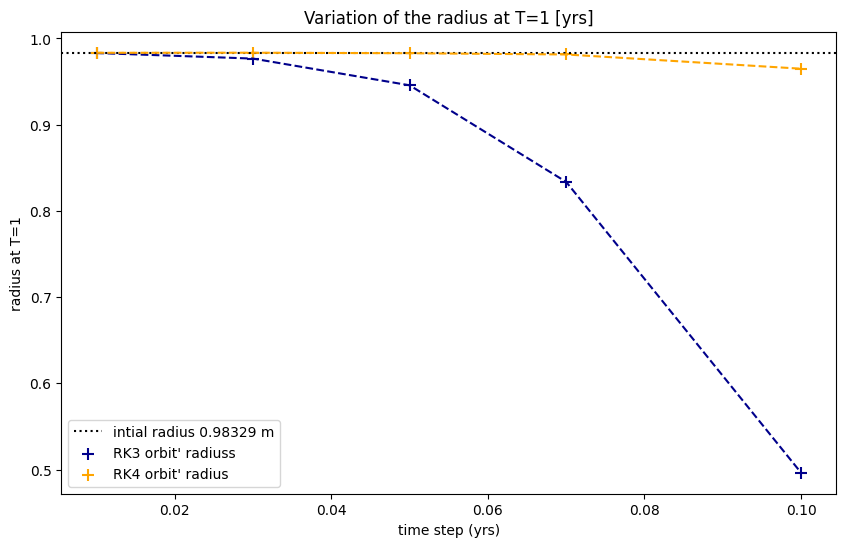

In [21]:
# Plot 

fig, ax = plt.subplots(figsize = (10, 6))


plt.axhline(y=r_0, color='black', linestyle=':', label = f'intial radius {r_0} m')

# rk3
ax.plot([dt_1, dt_2, dt_3, dt_4, dt_5], rk3_r, linestyle='--', color = 'darkblue')
ax.scatter([dt_1, dt_2, dt_3, dt_4, dt_5], rk3_r, color='darkblue', marker='+', s=70, label = "RK3 orbit' radiuss")

# rk4
ax.plot([dt_1, dt_2, dt_3, dt_4, dt_5], rk4_r, linestyle='--', color = "orange")
ax.scatter([dt_1, dt_2, dt_3, dt_4, dt_5], rk4_r, color='orange', marker='+', s=70, label = "RK4 orbit' radius")



ax.set_title('Variation of the radius at T=1 [yrs]')
ax.set_xlabel("time step (yrs)")
ax.set_ylabel("radius at T=1")

plt.legend()

plt.show()

In [22]:
# create an array with the initial radius
r1_0 = np.zeros(5)
r1_0[:] = r_0

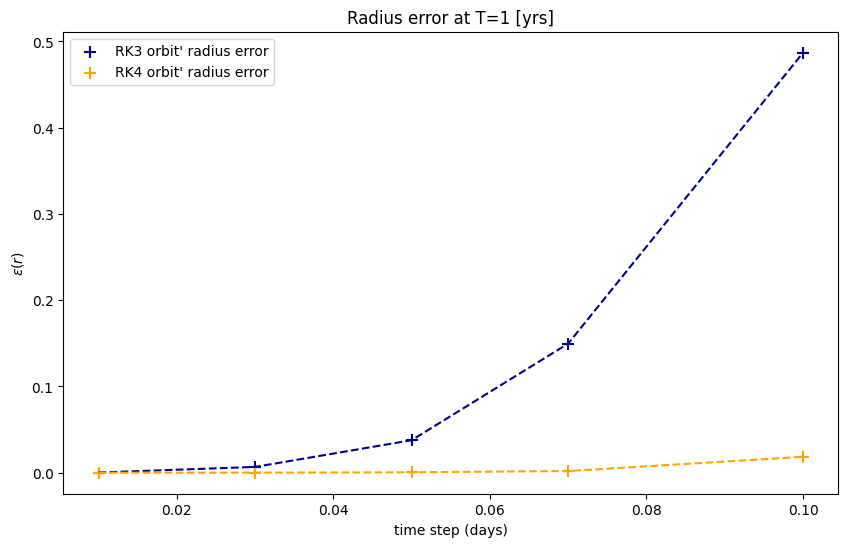

In [23]:
# plotting the errors
fig, ax = plt.subplots(figsize = (10, 6))


#plt.axhline(y=r_0, color='black', linestyle=':', label = f'intial radius {r_0} m')

# rk3
ax.plot([dt_1, dt_2, dt_3, dt_4, dt_5], abs(rk3_r - r1_0), linestyle='--', color = 'darkblue')
ax.scatter([dt_1, dt_2, dt_3, dt_4, dt_5], abs(rk3_r - r1_0), color='darkblue', marker='+', s=70, label = "RK3 orbit' radius error")

# rk4
ax.plot([dt_1, dt_2, dt_3, dt_4, dt_5], abs(rk4_r - r1_0), linestyle='--', color = "orange")
ax.scatter([dt_1, dt_2, dt_3, dt_4, dt_5], abs(rk4_r - r1_0), color='orange', marker='+', s=70, label = "RK4 orbit' radius error")



ax.set_title('Radius error at T=1 [yrs]')
ax.set_xlabel("time step (days)")
ax.set_ylabel(r"$\epsilon(r)$")

plt.legend()

plt.show()

We can see that for RK3 integrated orbits, as we increase the value of the time step, the final radius differs more and more from the initial radius. For a time step dt = 0.5 we have the more precise value for the radius. On the other hand, we can see that the RK4 integrated orbits, the final radius is closer to the initial radius, but for a time step dt =  4 the final radius starts to differ significantly. 

In summary, for small time steps we will get the better results for the orbit, but it will take more time and resourses to integrate. We can solve this problem, using high order RK methods, as RK4 method for example. As we saw, RK4 method is quite good for time step dt up to 3 days. 